In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("blinkit_data.csv")
df.sample()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
427,Regular,FDP49,Breakfast,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.069196,9.0,54.3614,4.9


In [3]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df['Item Weight'].isna().sum()/len(df)*100

17.165317376510618

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [17]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [22]:
Total_Sales = df['Sales'].sum()
print(f"Total Sales: {Total_Sales / 1_000_000:.2f} million")

Total Sales: 1.20 million


In [21]:
Avg_Sales = df['Sales'].mean()
print(Avg_Sales)

140.9927819781767


In [23]:
No_of_item_sold = df['Sales'].count()
print(No_of_item_sold)

8523


In [24]:
Avg_Rating = df['Rating'].mean()
print(Avg_Rating)

3.965857092573038


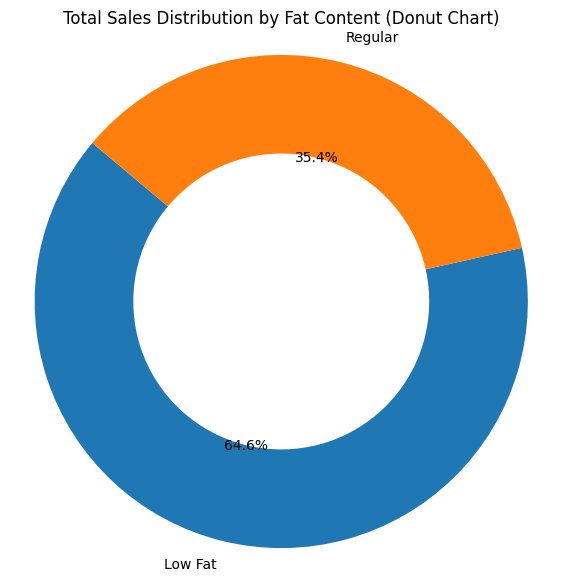

In [35]:
# Group total sales by fat content
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

# Create donut chart
plt.figure(figsize=(7, 7))
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Total Sales Distribution by Fat Content (Donut Chart)')
plt.axis('equal')
plt.show()

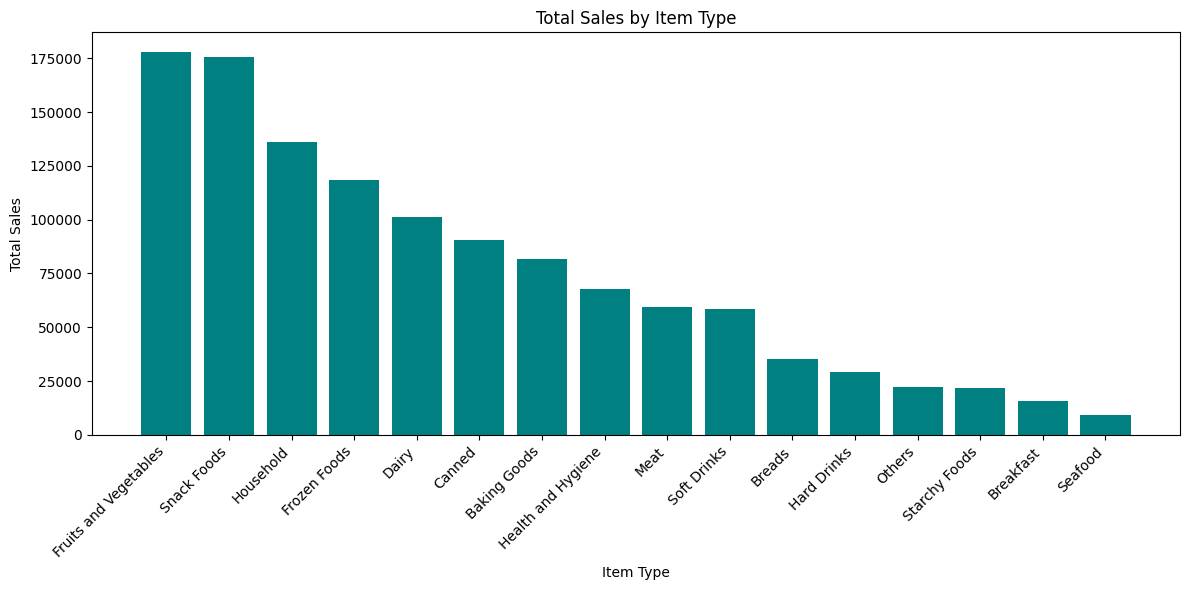

In [36]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(sales_by_item_type.index, sales_by_item_type.values, color='teal')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

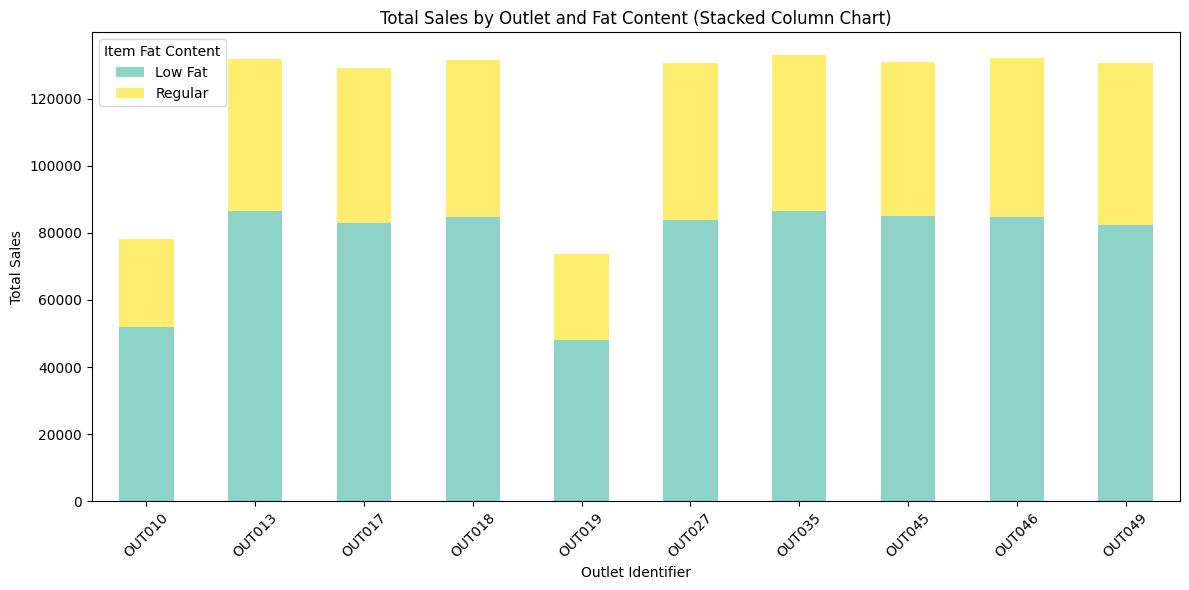

In [37]:
# Group sales by Outlet and Fat Content
sales_outlet_fat = df.groupby(['Outlet Identifier', 'Item Fat Content'])['Sales'].sum().unstack(fill_value=0)

# Plot stacked column chart
sales_outlet_fat.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Total Sales by Outlet and Fat Content (Stacked Column Chart)')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

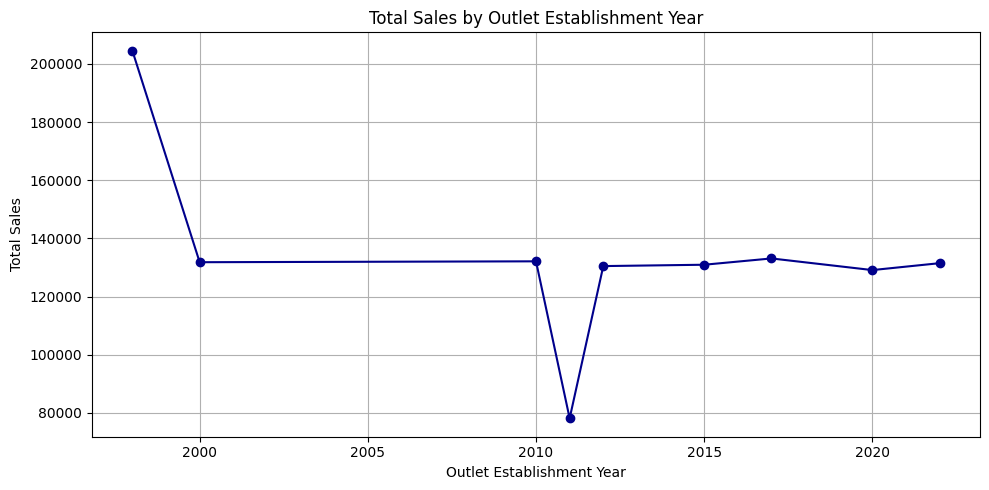

In [38]:
# Group total sales by establishment year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='darkblue')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

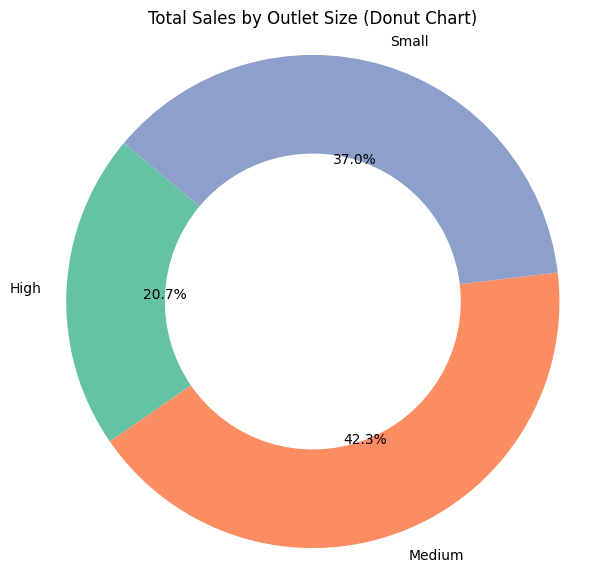

In [39]:
# Group total sales by outlet size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

# Plot donut chart
plt.figure(figsize=(7, 7))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%',
        startangle=140, wedgeprops=dict(width=0.4), colors=plt.cm.Set2.colors)
plt.title('Total Sales by Outlet Size (Donut Chart)')
plt.axis('equal')  # Keeps the circle aspect ratio
plt.show()